# Modelagem Preditiva da Eficiência Escolar

## Objetivo Geral

Desenvolver um modelo preditivo para prever os resultados normalizados de exames (`normexam`) de estudantes com base em suas características e nas características das escolas. Além disso, identificar qual tipo de escola (gênero misto, apenas homens, ou apenas mulheres) é mais eficiente na formação de seus alunos, de acordo com os resultados desses exames.

## Objetivos Específicos

1. **Analisar os dados fornecidos** para entender as características das escolas e dos alunos.
2. **Preparar os dados** para modelagem, tratando inconsistências e integrando as tabelas de escolas e alunos.
3. **Criar e treinar modelos preditivos** para prever o resultado do exame normalizado (`normexam`).
4. **Avaliar a eficiência dos tipos de escolas** com base nos parâmetros do modelo preditivo.
5. **Gerar uma análise concisa e justificar os resultados** com base nas métricas de desempenho do modelo.

## Perguntas a serem respondidas

**Quais tipos de escola (gênero misto, só de homens ou só
 de mulheres) é mais eficiente na formação de seus alunos de acordo com o resultado do exame
 normalizado (`normexam`)?**

## Imports


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


## Tratamento Dados

### Carregar dados para Data Frame

In [2]:
num_student_data = pd.read_csv('num_student_data.csv', delimiter=';')
num_school_data = pd.read_csv('num_school_data.csv', delimiter=';')
cat_student_data = pd.read_csv('cat_student_data.csv', delimiter=';')
cat_school_data = pd.read_csv('cat_school_data.csv', delimiter=';')

display(num_student_data.head())
display(num_school_data.head())
display(cat_student_data.head())
display(cat_school_data.head())



,school,student,variable,value
1,1,143.0,normexam,"0,2613242"
2,1,145.0,normexam,"0,1340672"
3,1,142.0,normexam,"-1,723882"
4,1,141.0,normexam,"0,9675862"
5,1,138.0,normexam,"0,5443412"


,school,variable,value
0,1,schavg,"0,1661752"
1,2,schavg,"0,3951492"
2,3,schavg,"0,5141552"
3,4,schavg,"0,0917642"
4,5,schavg,"0,2105252"


,school,student,variable,value
1,1,143,intake,bottom 25%
2,1,145,intake,mid 50%
3,1,142,intake,top 25%
4,1,141,intake,mid 50%
5,1,138,intake,mid 50%


,school,variable,value
0,1,schgend,mixed
1,2,schgend,girls
2,3,schgend,mixed
3,4,schgend,mixed
4,5,schgend,mixed


### Tratamento num_student_data

In [3]:
# Filtro para retirada de 'standLRT', visto que apenas 'normexam' será analisado
df_trabalho_num_student_data = num_student_data[num_student_data['variable'] != 'standLRT'].copy()

# Substituir vírgulas por pontos na coluna 'value'
df_trabalho_num_student_data.loc[:, 'value'] = df_trabalho_num_student_data['value'].str.replace(',', '.', regex=False)

# Converter a coluna 'value' para numérico, tratando erros como NaN
df_trabalho_num_student_data.loc[:, 'value'] = pd.to_numeric(df_trabalho_num_student_data['value'], errors='coerce')

# Remover linhas onde 'value' é NaN
df_trabalho_num_student_data = df_trabalho_num_student_data.dropna(subset=['value'])

# Remover linhas onde 'student' é NaN
df_trabalho_num_student_data = df_trabalho_num_student_data.dropna(subset=['student'])

# Remover todas as duplicatas
df_trabalho_num_student_data = df_trabalho_num_student_data.drop_duplicates(subset=['school', 'student'], keep=False)

print(f"Linhas: {df_trabalho_num_student_data.shape[0]}, Colunas: {df_trabalho_num_student_data.shape[1]}")
print(f"Linhas: {num_student_data.shape[0]}, Colunas: {num_student_data.shape[1]}")

Linhas: 3937, Colunas: 4
Linhas: 8118, Colunas: 4


### Tratamento num_school_data

In [4]:
df_trabalho_num_school_data = num_school_data

print(f"Linhas: {df_trabalho_num_school_data.shape[0]}, Colunas: {df_trabalho_num_school_data.shape[1]}")
print(f"Linhas: {num_school_data.shape[0]}, Colunas: {num_school_data.shape[1]}")


Linhas: 65, Colunas: 3
Linhas: 65, Colunas: 3


### Tratamento cat_student_data

In [5]:
df_trabalho_cat_student_data = cat_student_data

# Remover todas as duplicatas e manter primeiro registro para os casos que value são iguais
df_trabalho_cat_student_data = df_trabalho_cat_student_data.drop_duplicates(subset=['school', 'student', 'variable', 'value'], keep='first')

# Remover todas as duplicatas
df_trabalho_cat_student_data = df_trabalho_cat_student_data.drop_duplicates(subset=['school', 'student', 'variable'], keep=False)

print(f"Linhas: {df_trabalho_cat_student_data.shape[0]}, Colunas: {df_trabalho_cat_student_data.shape[1]}")
print(f"Linhas: {cat_student_data.shape[0]}, Colunas: {cat_student_data.shape[1]}")

Linhas: 11814, Colunas: 4
Linhas: 11828, Colunas: 4


In [6]:
# Criação de DF cat_student_data_intake
df_trabalho_cat_student_data_intake = df_trabalho_cat_student_data[df_trabalho_cat_student_data['variable'] == 'intake'].copy()
# Criação de DF cat_student_data_sex
df_trabalho_cat_student_data_sex = df_trabalho_cat_student_data[df_trabalho_cat_student_data['variable'] == 'sex'].copy()
# Criação de DF cat_student_data_vr
df_trabalho_cat_student_data_vr = df_trabalho_cat_student_data[df_trabalho_cat_student_data['variable'] == 'vr'].copy()

print(f"Linhas: {df_trabalho_cat_student_data_intake.shape[0]}, Colunas: {df_trabalho_cat_student_data_intake.shape[1]}")
print(f"Linhas: {df_trabalho_cat_student_data_sex.shape[0]}, Colunas: {df_trabalho_cat_student_data_sex.shape[1]}")
print(f"Linhas: {df_trabalho_cat_student_data_vr.shape[0]}, Colunas: {df_trabalho_cat_student_data_vr.shape[1]}")

Linhas: 3942, Colunas: 4
Linhas: 3914, Colunas: 4
Linhas: 3958, Colunas: 4


### Tratamento cat_school_data

In [7]:
# Carregar DF em DF para transformação se necessário
df_trabalho_cat_school_data = cat_school_data

print(f"Linhas: {df_trabalho_cat_school_data.shape[0]}, Colunas: {df_trabalho_cat_school_data.shape[1]}")
print(f"Linhas: {cat_school_data.shape[0]}, Colunas: {cat_school_data.shape[1]}")


Linhas: 130, Colunas: 3
Linhas: 130, Colunas: 3


In [8]:
# Criação de DF cat_school_data_schgend
df_trabalho_cat_school_data_schgend = df_trabalho_cat_school_data[df_trabalho_cat_school_data['variable'] == 'schgend'].copy()
# Criação de DF cat_school_data_type
df_trabalho_cat_school_data_type = df_trabalho_cat_school_data[df_trabalho_cat_school_data['variable'] == 'type'].copy()

print(f"Linhas: {df_trabalho_cat_school_data_schgend.shape[0]}, Colunas: {df_trabalho_cat_school_data.shape[1]}")
print(f"Linhas: {df_trabalho_cat_school_data_type.shape[0]}, Colunas: {cat_school_data.shape[1]}")


Linhas: 65, Colunas: 3
Linhas: 65, Colunas: 3


## Análise Exploratória de Dados (EDA)

In [9]:
# Adicionar o ranking
df_trabalho_num_school_data['rank'] = df_trabalho_num_school_data['value'].rank(ascending=False, method='dense')

# Realizando os Joins
df_combined = df_trabalho_num_school_data.merge(
    df_trabalho_cat_school_data_schgend[['school', 'value']],
    on='school',
    suffixes=('', '_schgend')
).merge(
    df_trabalho_cat_school_data_type[['school', 'value']],
    on='school',
    suffixes=('', '_type')
)

# Ordenar os dados pelo ranking
df_combined = df_combined.sort_values(by='rank')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df_combined

,school,variable,value,rank,value_schgend,value_type
5,6,schavg,"0,6376562",1.0,girls,Sngl
10,11,schavg,"0,6350562",2.0,boys,Sngl
53,54,schavg,"0,5880652",3.0,mixed,Mxd
2,3,schavg,"0,5141552",4.0,mixed,Mxd
19,20,schavg,"0,4410412",5.0,mixed,Mxd
63,64,schavg,"0,4341442",6.0,boys,Sngl
42,43,schavg,"0,4334322",7.0,mixed,Mxd
1,2,schavg,"0,3951492",8.0,girls,Sngl
18,19,schavg,"0,3846302",9.0,mixed,Mxd
52,53,schavg,"0,3805512",10.0,girls,Sngl


Os dados apresentados fornecem um panorama inicial sobre o desempenho das escolas, considerando o tipo (Singular ou Mista) e o gênero predominante. Embora algumas tendências sejam observadas, como as escolas Singulares (especialmente femininas) apresentando melhores desempenhos médios, os resultados indicam a necessidade de uma análise mais profunda para validar essas conclusões.

In [10]:
# Se valores originais forem strings com vírgula como separador decimal
df_combined['value'] = df_combined['value'].astype(str).str.replace(',', '.')
df_combined['value'] = pd.to_numeric(df_combined['value'], errors='coerce')

# Calcular medidas estatísticas agrupando por 'value_schgend'
statistics_schgend = df_combined.groupby('value_schgend')['value'].agg(
    mean='mean',        # Média
    median='median',    # Mediana
    std='std',          # Desvio Padrão
    min='min',          # Valor Mínimo
    max='max',          # Valor Máximo
    count='count'       # Contagem de valores
).reset_index()

print(statistics_schgend)


  value_schgend      mean    median       std       min       max  count
0          boys -0.095682 -0.080460  0.442039 -0.755961  0.635056     10
1         girls -0.017374 -0.034767  0.335849 -0.649018  0.637656     20
2         mixed -0.019842 -0.020198  0.325951 -0.654875  0.588065     35


 **Análise de Desempenho por Gênero de Escola (`value_schgend`)**

 **Desempenho Médio**
- Escolas **"girls"** apresentaram o melhor desempenho médio (**-0.017374**), seguidas por escolas **"mixed"** (**-0.019842**) e, por último, **"boys"** (**-0.095682**).

 **Mediana**
- A mediana do desempenho das escolas **"girls"** é **-0.034767**, mais próxima do ponto de referência em comparação às escolas **"mixed"** (**-0.020198**) e **"boys"** (**-0.080460**).

 **Variabilidade**
- Escolas **"boys"** apresentaram a maior variabilidade no desempenho, com desvio padrão de **0.442039**, indicando maior diferença entre os valores.
- Escolas **"mixed"** tiveram a menor variabilidade, com desvio padrão de **0.325951**, indicando maior consistência nos desempenhos.
- Escolas **"girls"** tiveram uma variabilidade intermediária, com desvio padrão de **0.335849**.

 **Melhor e Pior Desempenho**
- O melhor desempenho (`max`) foi registrado por escolas **"girls"** (**0.637656**).
- O pior desempenho (`min`) foi registrado por escolas **"boys"** (**-0.755961**).

 **Tamanho dos Grupos**
- **"boys"**: 10 escolas.
- **"girls"**: 20 escolas.
- **"mixed"**: 35 escolas.

In [11]:
# Se valores originais forem strings com vírgula como separador decimal
df_combined['value'] = df_combined['value'].astype(str).str.replace(',', '.')
df_combined['value'] = pd.to_numeric(df_combined['value'], errors='coerce')

# Calcular medidas estatísticas agrupando por 'value_schgend'
statistics_type = df_combined.groupby('value_type')['value'].agg(
    mean='mean',        # Média
    median='median',    # Mediana
    std='std',          # Desvio Padrão
    min='min',          # Valor Mínimo
    max='max',          # Valor Máximo
    count='count'       # Contagem de valores
).reset_index()

print(statistics_type)


  value_type      mean    median       std       min       max  count
0        Mxd -0.019842 -0.020198  0.325951 -0.654875  0.588065     35
1       Sngl -0.043477 -0.052493  0.368715 -0.755961  0.637656     30


 **Análise de Desempenho por Tipo de Escola (`value_type`)**

 **Desempenho Médio**
- Escolas **"Mxd"** (mistas) apresentaram um desempenho médio de **-0.019842**, melhor do que escolas **"Sngl"** (individuais), que tiveram um desempenho médio de **-0.043477**.

 **Mediana**
- A mediana do desempenho das escolas **"Mxd"** é **-0.020198**, enquanto para escolas **"Sngl"** é **-0.052493**.
  - Isso sugere que a maioria das escolas mistas têm desempenho mais próximo do ponto de referência em comparação às escolas individuais.

 **Variabilidade**
- O desvio padrão do desempenho das escolas **"Mxd"** é menor (**0.325951**), indicando menor variação nos desempenhos.
- Escolas **"Sngl"** apresentam maior variabilidade no desempenho, com desvio padrão de **0.368715**.

 **Melhor e Pior Desempenho**
- O melhor desempenho (`max`) foi de **0.637656**, registrado por uma escola **"Sngl"**.
- O pior desempenho (`min`) foi de **-0.755961**, também registrado por uma escola **"Sngl"**.
- Escolas **"Mxd"** tiveram um desempenho máximo de **0.588065** e mínimo de **-0.654875**.

 **Tamanho dos Grupos**
- **"Mxd"**: 35 escolas.
- **"Sngl"**: 30 escolas.


In [12]:
df_combined_students = pd.merge(
    df_trabalho_num_student_data,
    df_trabalho_cat_student_data_sex[['school', 'student', 'value']],
    on=['school', 'student'],
    how='left',
    suffixes=('', '_sex')
)
df_combined_students.rename(columns={'value': 'normexam_value', 'value_sex': 'sex_value'}, inplace=True)

# Se valores originais forem strings com vírgula como separador decimal
df_combined_students['normexam_value'] = df_combined_students['normexam_value'].astype(str).str.replace(',', '.')
df_combined_students['normexam_value'] = pd.to_numeric(df_combined_students['normexam_value'], errors='coerce')

# Calcular medidas estatísticas agrupando por 'value_schgend'
statistics_intake = df_combined_students.groupby('sex_value')['normexam_value'].agg(
    mean='mean',        # Média
    median='median',    # Mediana
    std='std',          # Desvio Padrão
    min='min',          # Valor Mínimo
    max='max',          # Valor Máximo
    count='count'       # Contagem de valores
).reset_index()

print(statistics_intake)


  sex_value      mean    median       std       min       max  count
0         F  0.089494  0.073536  0.971859 -3.059543  3.666091   2307
1         M -0.131479 -0.129085  1.023368 -3.666072  2.532352   1537


 **Análise de Desempenho por Gênero (`sex_value`)**

 **Desempenho Médio**
- Estudantes do sexo **Feminino (F)** apresentaram o melhor desempenho médio (**0.089494**), indicando que, em média, as estudantes superaram o ponto de referência.
- Estudantes do sexo **Masculino (M)** tiveram um desempenho médio negativo (**-0.131479**), sugerindo que os estudantes masculinos ficaram abaixo do ponto de referência em termos de desempenho.

 **Mediana**
- A mediana reflete o valor central de desempenho:
  - **Feminino (F)**: **0.073536** (a maioria das estudantes está acima do ponto de referência).
  - **Masculino (M)**: **-0.129085** (a maioria dos estudantes está abaixo do ponto de referência).

 **Variabilidade**
- O desvio padrão indica a dispersão do desempenho:
  - **Feminino (F)**: **0.971859**, com menor variabilidade em relação ao grupo masculino.
  - **Masculino (M)**: **1.023368**, indicando maior dispersão nos desempenhos, com uma distribuição mais ampla.

 **Melhor e Pior Desempenho**
- **Feminino (F)**:
  - Melhor desempenho (`max`): **3.666091**.
  - Pior desempenho (`min`): **-3.059543**.
- **Masculino (M)**:
  - Melhor desempenho (`max`): **2.532352**.
  - Pior desempenho (`min`): **-3.666072**.

 **Tamanho dos Grupos**
- **Feminino (F)**: 2307 estudantes (maior grupo).
- **Masculino (M)**: 1537 estudantes (menor grupo).



In [13]:
# Realizando o join entre df_combined_students e df_cat_school_data_type com base na coluna 'school'
df_combined_with_school = df_combined_students.merge(
    df_trabalho_cat_school_data_type[['school', 'value']],
    on='school',
    how='left',
    suffixes=('', '_type_school')
)

# Renomeando a coluna 'value' do df_cat_school_data_type para 'type_school'
df_combined_with_school.rename(columns={'value': 'type_school'}, inplace=True)

# Calculando as estatísticas agrupando por 'sex_value' e 'type_school' (tipo da escola)
statistics_sex_type = df_combined_with_school.groupby(['sex_value', 'type_school'])['normexam_value'].agg(
    mean='mean',        # Média
    median='median',    # Mediana
    std='std',          # Desvio padrão
    min='min',          # Valor mínimo
    max='max',          # Valor máximo
    count='count'       # Contagem de valores
).reset_index()

# Ordenando os resultados pela média ('mean')
statistics_sex_type = statistics_sex_type.sort_values(by='mean', ascending=False)

print(statistics_sex_type)

  sex_value type_school      mean    median       std       min       max  \
1         F        Sngl  0.146746  0.134067  0.984073 -3.059543  3.666091   
3         M        Sngl  0.023032  0.073536  1.060487 -2.752660  2.532352   
0         F         Mxd  0.014534  0.004322  0.950919 -2.752660  2.924667   
2         M         Mxd -0.204226 -0.197611  0.997676 -3.666072  2.408692   

   count  
1   1308  
3    492  
0    999  
2   1045  


 **Análise de Desempenho por Sexo e Tipo de Escola**

 **Desempenho Médio**
- **Feminino (F) - Escolas Singulares (Sngl)**:
  - Melhor desempenho médio (**0.146746**).
  - Indica que, em média, as alunas em escolas singulares superaram os demais grupos.
- **Masculino (M) - Escolas Singulares (Sngl)**:
  - Segundo melhor desempenho médio (**0.023032**).
  - Estudantes masculinos de escolas singulares tiveram desempenho médio positivo, mas significativamente inferior ao grupo feminino.
- **Feminino (F) - Escolas Mistas (Mxd)**:
  - Desempenho médio próximo de zero (**0.014534**), indicando equilíbrio em relação ao ponto de referência.
- **Masculino (M) - Escolas Mistas (Mxd)**:
  - Pior desempenho médio (**-0.204226**).
  - Os estudantes masculinos em escolas mistas apresentaram desempenho médio abaixo do ponto de referência.

 **Mediana**
- A mediana reflete o desempenho central:
  - **Feminino (F) - Escolas Singulares (Sngl)**: **0.134067** (desempenho consistente acima do ponto de referência).
  - **Masculino (M) - Escolas Singulares (Sngl)**: **0.073536** (desempenho central positivo, mas inferior ao grupo feminino).
  - **Feminino (F) - Escolas Mistas (Mxd)**: **0.004322** (mediana próxima de zero).
  - **Masculino (M) - Escolas Mistas (Mxd)**: **-0.197611** (desempenho central mais baixo).

 **Variabilidade**
- O desvio padrão indica a dispersão do desempenho:
  - **Feminino (F) - Escolas Singulares (Sngl)**: **0.984073** (moderada variabilidade).
  - **Masculino (M) - Escolas Singulares (Sngl)**: **1.060487** (maior dispersão no grupo masculino).
  - **Feminino (F) - Escolas Mistas (Mxd)**: **0.950919** (variabilidade moderada).
  - **Masculino (M) - Escolas Mistas (Mxd)**: **0.997676** (dispersão menor que o grupo singular masculino, mas ainda significativa).

 **Melhor e Pior Desempenho**
- **Melhor desempenho absoluto**: Feminino (F) - Escolas Singulares (**3.666091**).
- **Pior desempenho absoluto**: Masculino (M) - Escolas Mistas (**-3.666072**).

 **Tamanho dos Grupos**
- **Feminino (F) - Escolas Singulares (Sngl)**: 1308 estudantes (maior grupo).
- **Masculino (M) - Escolas Singulares (Sngl)**: 492 estudantes.
- **Feminino (F) - Escolas Mistas (Mxd)**: 999 estudantes.
- **Masculino (M) - Escolas Mistas (Mxd)**: 1045 estudantes.


## Modelagem de Dados

In [14]:
df_combined = df_trabalho_num_student_data.merge(
    df_trabalho_cat_student_data_sex[['school', 'student', 'value']],
    on=['school', 'student'],
    how='left',
    suffixes=('', '_sex')
).merge(
    df_trabalho_cat_school_data_schgend[['school', 'value']],
    on='school',
    how='left',
    suffixes=('', '_schgend')
).merge(
    df_trabalho_cat_school_data_type[['school', 'value']],
    on='school',
    how='left',
    suffixes=('', '_type')
).merge(
    df_trabalho_num_school_data[['school', 'value']],
    on='school',
    how='left',
    suffixes=('', '_num_school')
).merge(
    df_trabalho_cat_student_data_vr[['school', 'student', 'value']],
    on=['school', 'student'],
    how='left',
    suffixes=('', '_vr')
).merge(
    df_trabalho_cat_student_data_intake[['school', 'student', 'value']],
    on=['school', 'student'],
    how='left',
    suffixes=('', '_intake')
)

df_combined.rename(
    columns={
        'value': 'normexam_value',
        'value_sex': 'sex_value',
        'value_schgend': 'schgend_value',
        'value_type': 'type_value',
        'value_num_school': 'school_numeric_value',
        'value_vr': 'vr_value',
        'value_intake': 'intake_value'
    },
    inplace=True
)

print(df_combined.head())


   school  student  variable normexam_value sex_value schgend_value  \
0       1    143.0  normexam       0.261324         F         mixed   
1       1    145.0  normexam       0.134067         F         mixed   
2       1    142.0  normexam      -1.723882         M         mixed   
3       1    141.0  normexam       0.967586         F         mixed   
4       1    138.0  normexam       0.544341         F         mixed   

  type_value school_numeric_value vr_value intake_value  
0        Mxd            0,1661752  mid 50%   bottom 25%  
1        Mxd            0,1661752  mid 50%      mid 50%  
2        Mxd            0,1661752  mid 50%      top 25%  
3        Mxd            0,1661752  mid 50%      mid 50%  
4        Mxd            0,1661752  mid 50%      mid 50%  


In [17]:
# Convertendo variáveis categóricas em dummies (one-hot encoding)
df_combined_encoded = pd.get_dummies(df_combined, columns=['sex_value', 'schgend_value', 'type_value', 'vr_value', 'intake_value'], drop_first=True)

# Corrigindo valores numéricos representados como strings
df_combined_encoded = df_combined_encoded.applymap(
    lambda x: float(str(x).replace(',', '.')) if isinstance(x, str) and ',' in x else x
)

# Separando as features e o target
X = df_combined_encoded.drop(columns=['normexam_value', 'school', 'student', 'variable'])
y = df_combined_encoded['normexam_value']

# Garantindo que não haja valores nulos
if X.isnull().any().any():
    print("Preenchendo valores nulos com a média...")
    X = X.fillna(X.mean())

# Dividindo em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Regressão Linear
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# 2. Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Regressão Linear - MSE: {mse_linear}, R²: {r2_linear}")
print(f"Random Forest - MSE: {mse_rf}, R²: {r2_rf}")


C:\Users\thiago.faria\AppData\Local\Temp\ipykernel_9148\1836931683.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_combined_encoded = df_combined_encoded.applymap(


Regressão Linear - MSE: 0.6718657228763522, R²: 0.3056491621921079
Random Forest - MSE: 0.6671518850970696, R²: 0.3105207564703856


O R² de ~0.31 sugere que o modelo está capturando parte das variações no desempenho dos estudantes, mas há espaço para melhorias, possivelmente adicionando mais variáveis relevantes ou testando outros algoritmos, como Gradient Boosting (e.g., XGBoost).

In [18]:
# Padronização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divisão de dados
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}
grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Melhor modelo
best_gb_model = grid_search.best_estimator_

# Previsão e Avaliação
y_pred_gb = best_gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting - MSE: {mse_gb}, R²: {r2_gb}")
print("Melhores parâmetros:", grid_search.best_params_)


Gradient Boosting - MSE: 0.6411692403865231, R²: 0.33737295402854695
Melhores parâmetros: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


MSE (Mean Squared Error): O erro médio quadrático diminuiu, indicando que o modelo está fazendo previsões mais precisas.
R² (Coeficiente de Determinação): O R² de 0.337 indica que o modelo está capturando mais de 1/3 da variância dos resultados do exame normalizado (normexam_value), o que é razoável considerando os dados disponíveis.

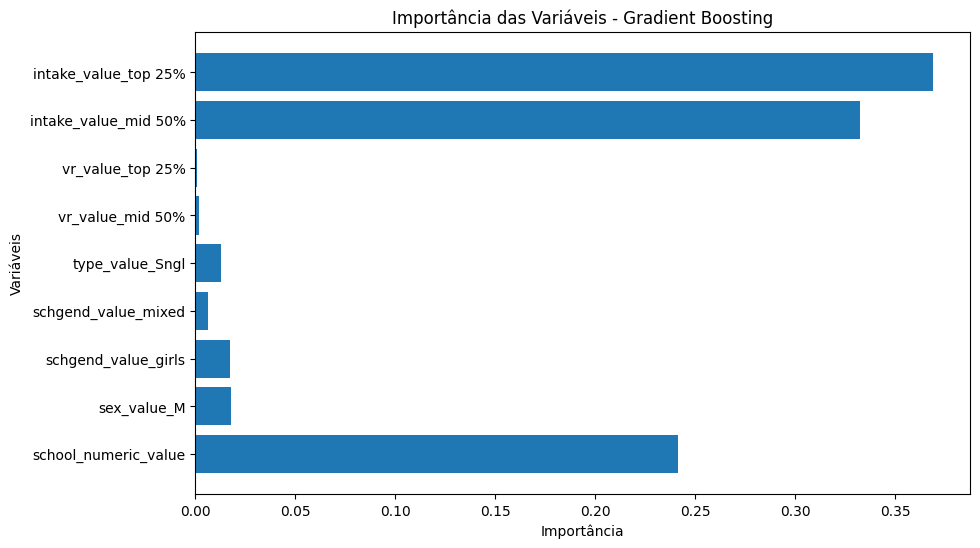

In [19]:
importance = best_gb_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance)
plt.title("Importância das Variáveis - Gradient Boosting")
plt.xlabel("Importância")
plt.ylabel("Variáveis")
plt.show()


In [20]:
scores = cross_val_score(best_gb_model, X, y, cv=10, scoring='r2')
print(f"R² médio (10-fold CV): {scores.mean()}, Desvio padrão: {scores.std()}")


R² médio (10-fold CV): 0.19036032137408887, Desvio padrão: 0.16112740714530788


In [21]:
df_combined['predicted_normexam'] = best_gb_model.predict(X)

# Analisando por tipo de escola
school_analysis = df_combined.groupby('type_value')['predicted_normexam'].agg(['mean', 'std', 'count'])
print(school_analysis)

                mean       std  count
type_value                           
Mxd        -0.203593  0.174545   2097
Sngl       -0.080234  0.111557   1840


C:\Users\thiago.faria\desafio_murabei\.env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


Conclusões Preliminares
Escolas singulares (Sngl) parecem ser mais eficientes na formação de seus alunos com base no desempenho médio no exame normalizado (normexam_value), tanto em termos de média quanto de variabilidade.
Escolas mistas (Mxd) apresentam maior variabilidade no desempenho e um desempenho médio inferior.

In [22]:
# Estatísticas descritivas agrupadas por sexo e tipo de escola
grouped_sex_type = df_combined.groupby(['sex_value', 'type_value']).agg(
    mean_normexam=('normexam_value', 'mean'),
    std_normexam=('normexam_value', 'std'),
    count=('normexam_value', 'count')
).reset_index()

print(grouped_sex_type)


  sex_value type_value mean_normexam  std_normexam  count
0         F        Mxd      0.014534      0.950919    999
1         F       Sngl      0.146746      0.984073   1308
2         M        Mxd     -0.204226      0.997676   1045
3         M       Sngl      0.023032      1.060487    492


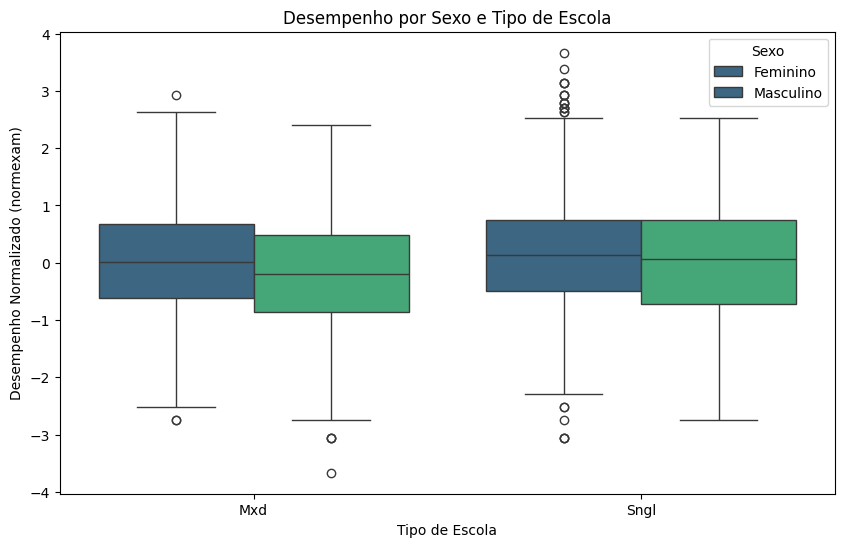

In [23]:
# Boxplot de desempenho por sexo e tipo de escola
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_combined, x='type_value', y='normexam_value', hue='sex_value', palette='viridis')
plt.title('Desempenho por Sexo e Tipo de Escola')
plt.ylabel('Desempenho Normalizado (normexam)')
plt.xlabel('Tipo de Escola')
plt.legend(title='Sexo', labels=['Feminino', 'Masculino'])
plt.show()


In [24]:
df_combined['sex_type'] = df_combined['sex_value'] + '_' + df_combined['type_value']


In [25]:
# One-hot encoding para variáveis categóricas
X = pd.get_dummies(df_combined.drop(['normexam_value'], axis=1), drop_first=True)
y = df_combined['normexam_value']

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [26]:
gb_model = GradientBoostingRegressor(
    learning_rate=0.1,
    max_depth=3,
    n_estimators=100,
    random_state=42
)

gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting - MSE: {mse_gb}, R²: {r2_gb}")


Gradient Boosting - MSE: 0.6342328791054659, R²: 0.34454145229070143


In [27]:
gb_model = GradientBoostingRegressor(
    learning_rate=0.1,
    max_depth=3,
    n_estimators=100,
    random_state=42
)

gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting - MSE: {mse_gb}, R²: {r2_gb}")


Gradient Boosting - MSE: 0.6342328791054659, R²: 0.34454145229070143


In [28]:
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': gb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)



                           Feature  Importance
74            intake_value_top 25%    0.334737
73            intake_value_mid 50%    0.305837
0                           school    0.082441
1                          student    0.063185
61  school_numeric_value_0,3805512    0.037975
72                vr_value_top 25%    0.028832
2               predicted_normexam    0.024232
38  school_numeric_value_-0,545095    0.012410
76                  sex_type_M_Mxd    0.011762
48  school_numeric_value_0,1562112    0.010860
59  school_numeric_value_0,3232042    0.010083
52  school_numeric_value_0,1963172    0.006171
31  school_numeric_value_-0,353908    0.005670
10  school_numeric_value_-0,029003    0.005345
56  school_numeric_value_0,2673852    0.005078
5              schgend_value_mixed    0.004373
40  school_numeric_value_-0,649018    0.004246
46  school_numeric_value_0,0917642    0.004065
16  school_numeric_value_-0,096466    0.003281
8    school_numeric_value_-0,01305    0.003036
6            

In [29]:
# Adicionar predições ao DataFrame original
df_combined['predicted_normexam'] = gb_model.predict(X)

# Agrupar por sexo e tipo de escola
results_by_sex_type = df_combined.groupby(['sex_value', 'type_value'])['predicted_normexam'].agg(
    mean='mean',
    std='std',
    count='count'
).reset_index()

print(results_by_sex_type)


  sex_value type_value      mean       std  count
0         F        Mxd  0.018449  0.531610    999
1         F       Sngl  0.132940  0.602088   1308
2         M        Mxd -0.185360  0.585451   1045
3         M       Sngl  0.002408  0.606914    492


In [30]:
male_data = df_combined[df_combined['sex_value'] == 'M']
female_data = df_combined[df_combined['sex_value'] == 'F']

for data, label in [(male_data, 'Male'), (female_data, 'Female')]:
    X_group = pd.get_dummies(data.drop(['normexam_value', 'predicted_normexam'], axis=1), drop_first=True)
    y_group = data['normexam_value']
    
    X_train_group, X_test_group, y_train_group, y_test_group = train_test_split(X_group, y_group, test_size=0.3, random_state=42)
    
    group_model = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, n_estimators=100, random_state=42)
    group_model.fit(X_train_group, y_train_group)
    y_pred_group = group_model.predict(X_test_group)
    
    mse_group = mean_squared_error(y_test_group, y_pred_group)
    r2_group = r2_score(y_test_group, y_pred_group)
    
    print(f"Grupo {label} - MSE: {mse_group}, R²: {r2_group}")


Grupo Male - MSE: 0.7217933762560437, R²: 0.3007605204998953
Grupo Female - MSE: 0.6282695702282779, R²: 0.34839659235757836


# Conclusão: Análise de Desempenho por Sexo e Tipo de Escola

 **1. Desempenho por Sexo e Tipo de Escola**

 **Feminino em Escolas Singulares (F, Sngl)**
- **Média**: 0.132940  
- **Desvio padrão**: 0.602088  
- **Contagem**: 1308  
- Este grupo apresenta o **melhor desempenho médio** entre todos os subgrupos.

 **Feminino em Escolas Mistas (F, Mxd)**
- **Média**: 0.018449  
- **Desvio padrão**: 0.531610  
- **Contagem**: 999  
- O desempenho é inferior ao das escolas singulares, mas **ainda positivo**.

 **Masculino em Escolas Mistas (M, Mxd)**
- **Média**: -0.185360  
- **Desvio padrão**: 0.585451  
- **Contagem**: 1045  
- Este grupo tem o **pior desempenho médio** entre todos os subgrupos.

 **Masculino em Escolas Singulares (M, Sngl)**
- **Média**: 0.002408  
- **Desvio padrão**: 0.606914  
- **Contagem**: 492  
- Embora o desempenho médio seja melhor do que o de homens em escolas mistas, ainda é **inferior ao desempenho das mulheres**.

---

 **2. Desempenho do Modelo por Sexo**

 **Grupo Masculino (Male)**
- **MSE**: 0.7218  
- **R²**: 0.3008  
- O modelo conseguiu capturar cerca de **30% da variabilidade nos dados** para este grupo. Apesar disso, o erro médio quadrático é maior, indicando menor precisão.

 **Grupo Feminino (Female)**
- **MSE**: 0.6283  
- **R²**: 0.3484  
- O modelo performa melhor no grupo feminino, capturando cerca de **35% da variabilidade nos dados**, com um menor erro médio quadrático.

---

 **3. Conclusões**

 **Melhor Tipo de Escola**
- As **escolas singulares (Sngl)** são mais eficientes tanto para homens quanto para mulheres.

 **Melhor Sexo**
- As **mulheres (Female)** apresentam desempenho médio superior ao dos homens em ambos os tipos de escola.
